In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Učitavanje podataka

In [3]:
data_path = 'datasets/'
movies_filename = 'movies.csv'
ratings_filename = 'ratings.csv'

movies_df = pd.read_csv(os.path.join(data_path, movies_filename), usecols=['movieId', 'title'], dtype={'movieId': 'int32', 'title': 'str'})
ratings_df = pd.read_csv(os.path.join(data_path, ratings_filename), usecols=['userId', 'movieId', 'rating'], dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

### Prikaz i opis podataka movies_df

In [4]:
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [5]:
movies_df.shape

(9742, 2)

In [6]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


### Prikaz i opis podataka ratings_df

In [7]:
ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [8]:
ratings_df.shape

(100836, 3)

In [9]:
ratings_df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


### Broj glasova, prosečna ocena

In [10]:
movies_votes_df = movies_df.copy()
movies_votes_df['countVotes']=ratings_df.groupby('movieId')['movieId'].transform('count')
movies_votes_df['averageVotes']=ratings_df.groupby('movieId')['rating'].transform('mean')
movies_votes_df.head()

,movieId,title,countVotes,averageVotes
0,1,Toy Story (1995),215,3.920930
1,2,Jumanji (1995),52,3.259615
2,3,Grumpier Old Men (1995),102,3.946079
3,4,Waiting to Exhale (1995),203,3.975369
4,5,Father of the Bride Part II (1995),204,4.237745


Najjednostavniji sistemi preporuka zasnovani su na ideji da najpopularnije stavke (to mogu biti stavke koje su ocenjene najvišom ocenom ili stavke koje su dobile najveći broj ocena ili oba) imaju veću verovatnoću da se dopadnu prosečnim korisnicima. Naime, oni različitim korisnicima nude uopštenu preporuku, bez obzira na ocene koje je svaki korisnik dao u prošlosti. Ovo su sistemi preporuka zasnovani na popularnosti (eng. popularity based recommender systems), i oni neće biti razmatrani u ovom radu. Ipak, radi sticanja uvida u skup podataka sa kojim se raspolaže, biće prikazani filmovi koji su dobili najviše prosečne ocene kao i filmovi koji su dobili najviše ocena, odnosno glasova. U prvom slučaju biće prikazano 20, a u drugom 40 filmova, da bi se videla raznovrsnost ocena, odnosno broja ocena.

In [11]:
movies_votes_df.sort_values(by='averageVotes', ascending=False).head(20)

,movieId,title,countVotes,averageVotes
8658,120919,Man on High Heels (2014),2,5.000000
9414,165529,Flowers for Algernon (2000),1,5.000000
294,336,"Walking Dead, The (1995)",1,5.000000
8686,122892,Avengers: Age of Ultron (2015),1,5.000000
9407,165101,Inferno (2016),1,5.000000
8698,122924,X-Men: Apocalypse (2016),1,5.000000
290,332,Village of the Damned (1995),1,5.000000
483,551,"Nightmare Before Christmas, The (1993)",1,5.000000
260,300,Quiz Show (1994),1,5.000000
9147,147376,Doctor Who: A Christmas Carol (2010),1,5.000000


In [12]:
movies_votes_df.sort_values(by='countVotes', ascending=False).head(40)

,movieId,title,countVotes,averageVotes
2339,3097,"Shop Around the Corner, The (1940)",329,4.164134
6518,53972,Live Free or Die Hard (2007),329,4.164134
9175,149011,He Never Died (2015),329,4.164134
7118,71033,"Secret in Their Eyes, The (El secreto de sus o...",329,4.164134
1801,2401,Pale Rider (1985),329,4.164134
1678,2259,Blame It on Rio (1984),329,4.164134
7093,70305,Race to Witch Mountain (2009),329,4.164134
1578,2117,1984 (Nineteen Eighty-Four) (1984),329,4.164134
1445,1968,"Breakfast Club, The (1985)",329,4.164134
1409,1929,Grand Hotel (1932),329,4.164134


### Grafički prikaz zavisnosti prosečne ocene filma od broja dobijenih ocena

Text(0, 0.5, 'Broj dobijenih ocena')

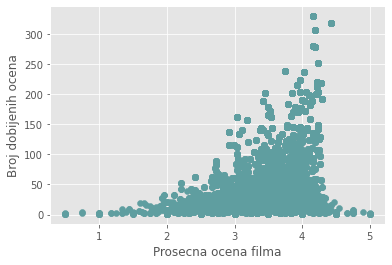

In [13]:
plt.scatter(np.array(movies_votes_df['averageVotes']), np.array(movies_votes_df['countVotes']), color = 'cadetblue')
plt.xlabel('Prosecna ocena filma')
plt.ylabel('Broj dobijenih ocena')

### Broj jedinstvenih korisnika, filmova, ocena

In [14]:
num_users = len(ratings_df.userId.unique())
num_items = len(ratings_df.movieId.unique())
print('Postoji {} jedinstvenih korisnika i {} jedinstvenih filmova u ovom skupu podataka.'.format(num_users, num_items))

Postoji 610 jedinstvenih korisnika i 9724 jedinstvenih filmova u ovom skupu podataka.


In [15]:
df_ratings_count = pd.DataFrame(ratings_df.groupby('rating').size(), columns=['count'])
df_ratings_count

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [16]:
ratings_df.shape
print('Postoji {} jedinstvenih (eng. unique) ocena u ovom skupu podataka.'.format(ratings_df.shape[0]))

Postoji 100836 jedinstvenih (eng. unique) ocena u ovom skupu podataka.


### Najmanja i najveća dodeljena ocena

In [17]:
ratings_min = ratings_df['rating'].min()
ratings_max = ratings_df['rating'].max()
print('Skala ocena: od ', ratings_min, ' do ', ratings_max) #TODO

Skala ocena: od  0.5  do  5.0


### Broj nedostajućih ocena

In [18]:
# U ratings_df su samo redovi kod kojih je rating > 0.
# Ukoliko se od svih mogucih kombinacija userId x movieId
# oduzme broj redova u ratings_fd, dobice se vrednost koja
# prestavlja koliko ima parova korisnik, film koji nije ocenjen,
# odnosno koliko ima ocena 0.

total_count = num_users * num_items
total_count

5931640

In [19]:
rating_zero_count = total_count - ratings_df.shape[0]

df_ratings_final_count = df_ratings_count.append(
    pd.DataFrame({'count': rating_zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_final_count

,count
0.0,5830804
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [20]:
#log normalizacija podataka zbog lakse interpretacije na grafiku
import numpy as np
df_ratings_final_count['log_count'] = np.log(df_ratings_final_count['count'])
df_ratings_final_count

,count,log_count
0.0,5830804,15.578665
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


Text(0, 0.5, 'broj glasova')

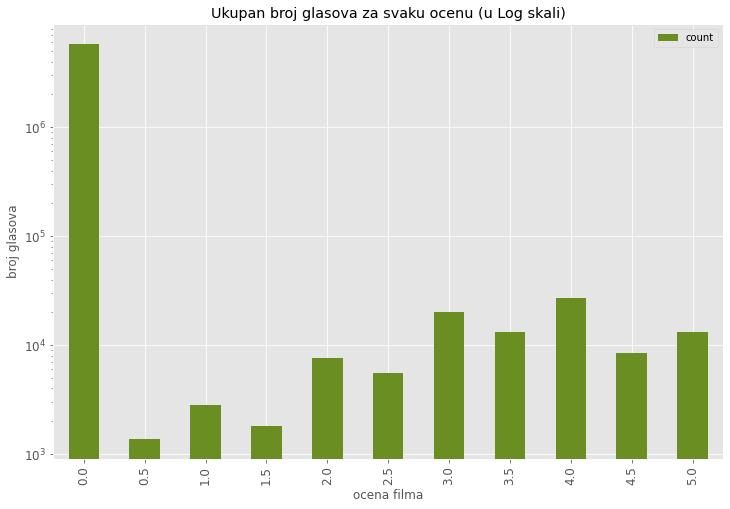

In [21]:
# %matplotlib inline
ax = df_ratings_final_count[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Ukupan broj glasova za svaku ocenu (u Log skali)',
    logy=True,
    fontsize=12,
    color='olivedrab'
)
ax.set_xlabel("ocena filma")
ax.set_ylabel("broj glasova")

### Učestalost glasova

In [22]:
# ucestalost glasova (ocena)
# broj glasova za svaki film (id svakog filma)
df_movies_count = pd.DataFrame(ratings_df.groupby('movieId').size(), columns=['count'])
df_movies_count.head(10)

,count
movieId,
1,215
2,110
3,52
4,7
5,49
6,102
7,54
8,8
9,16


Text(0, 0.5, 'id filma')

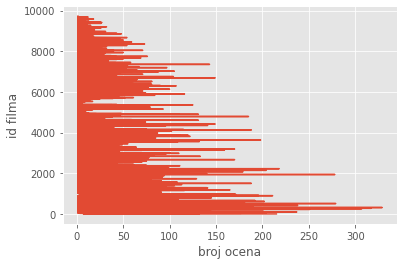

In [24]:
list_movies_count = []

for row in df_movies_count.values:
    list_movies_count.append(row[0])

array_movies_count = np.array(list_movies_count)

plt.plot(array_movies_count, np.arange(len(list_movies_count)))
#plt.bar(array_movies_count, np.arange(len(list_movies_count)))
plt.xlabel('broj ocena')
plt.ylabel('id filma')

Text(0, 0.5, 'id filma')

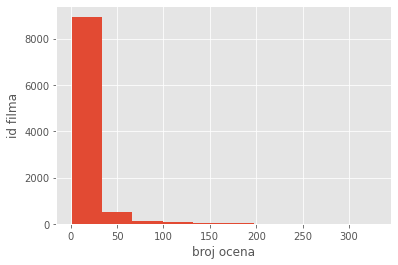

In [27]:
plt.hist(array_movies_count)
plt.xlabel('broj ocena')
plt.ylabel('id filma')